Testing the complexity of a naive dynamic implementation of 0-1 Knapsack Problem.
Illustrates why this solutions runs only in pseudo polynomial time.

- Test 1: Fixed knapsack capacity and increasing number of elements.
- Test 2: Increasing knapsack capacity but fixed number of elements.
- Test 3: Increasing amount of elements and capacity.

Test 1 and 2 run in polynomial time because one value of O(nW) is always fixed.
Test 3 shows the NP-Complete behaviour again because no value is capped.

In [69]:
# SETUP
import pylab
import numpy as np

from knapsack_algorithms import knapsack_dynamic as dynamic

# Runs knapsack_dynamic with random values.
# N - amount of elements
# V - max possible value
# W - knapsack capacity and max weight of an element
def random_dynamic(N, V, W):
    val = np.random.randint(0, V, N)
    wt = np.random.randint(0, W, N)
    n = len(val)
    dynamic.knapsack_dynamic(W, wt, val, n)

1.09 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.84 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
2.64 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
3.44 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
4.18 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
5.61 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
6.35 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
7.24 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
8.15 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
40.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
TEST 1 took 40.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


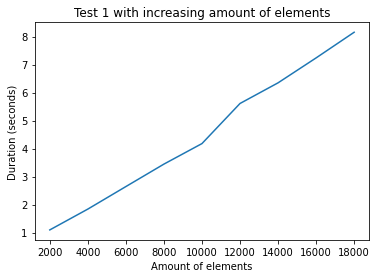

In [128]:
# TEST 1
# - increasing elements
# - fix capacity
# - fix max possible value
# Expectations: Should increase in linear time because only n is growing in O(nW)
def run_test01():
    x = []
    y = []
    step = 2000
    start = 2000
    stop = 20000
    V = 120
    W = 600 # 10min in sec - Example for a average adbreak
    for N in range(start, stop, step):
        # N - amount of elements
        # V - max possible value
        # W - knapsack capacity and max weight of an element
        result = %timeit -n1 -r1 -o random_dynamic(N, V, W)
        y.append(result.average)
        x.append(N)

    pylab.xlabel('Amount of elements')
    pylab.ylabel('Duration (seconds)')
    pylab.title('Test 1 with increasing amount of elements')
    pylab.plot(x, y)


test = %timeit -n1 -r1 -o run_test01()
print("TEST 1 took {}".format(test))

961 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.71 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
2.52 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
3.36 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
4.27 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
5.12 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
6.16 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
6.94 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
7.85 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
38.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
TEST 2 took 38.916724446986336


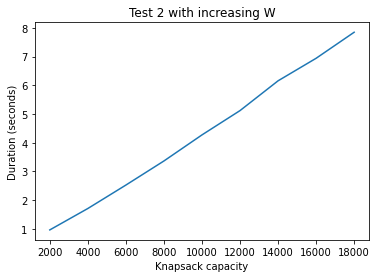

In [131]:
# TEST 2
# - fix elements
# - increasing capacity
# - fix max possible value
# Expectations: Should increase in linear time because only W is growing in O(nW)
def run_test02():
    x = []
    y = []
    step = 2000
    start = 2000
    stop = 20000
    N = 600
    V = 120
    for W in range(start, stop, step):  #
        # N - amount of elements
        # V - max possible value
        # W - knapsack capacity and max weight of an element
        result = %timeit -n1 -r1 -o random_dynamic(N, V, W)
        y.append(result.average)
        x.append(W)

    pylab.xlabel('Knapsack capacity')
    pylab.ylabel('Duration (seconds)')
    pylab.title('Test 2 with increasing W')
    pylab.plot(x, y)

test = %timeit -n1 -r1 -o run_test02()
print("TEST 2 took {}".format(test.average))

1.04 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
3.26 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
6.77 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
11.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
18.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
26.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
36.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
45.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1min ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
3min 29s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
TEST 3 took 209.55676707399834


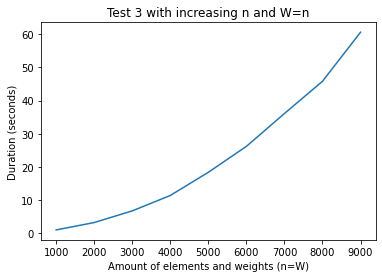

In [119]:
# TEST 3
# - increasing elements
# - increasing capacity
# - fix max possible value
# Expectations: Should increase in n^2 because n and W are growing in O(nW)
def run_test03():
    x = []
    y = []
    step = 1000
    start = 1000
    stop = 10000
    V = 20
    for N in range(start, stop, step):  #
        # N - amount of elements
        # V - max possible value
        # W - knapsack capacity and max weight of an element
        W = N # make W increase like N
        result = %timeit -n1 -r1 -o random_dynamic(N, V, W)
        y.append(result.average)
        x.append(W)

    pylab.xlabel('Amount of elements and weights (n=W)')
    pylab.ylabel('Duration (seconds)')
    pylab.title('Test 3 with increasing n and W=n')
    pylab.plot(x, y)


test = %timeit -n1 -r1 -o run_test03()
print("TEST 3 took {}".format(test.average))